In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Overview over the data

In [5]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

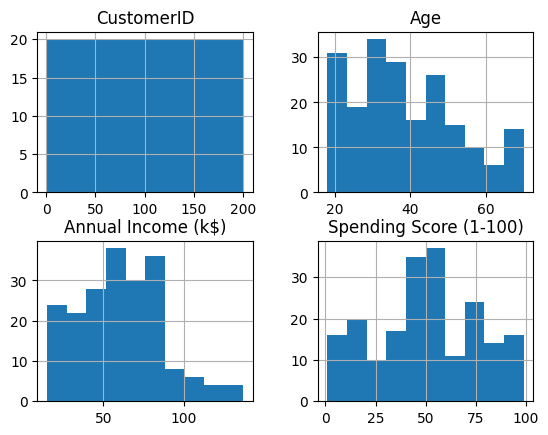

In [9]:
df.hist()

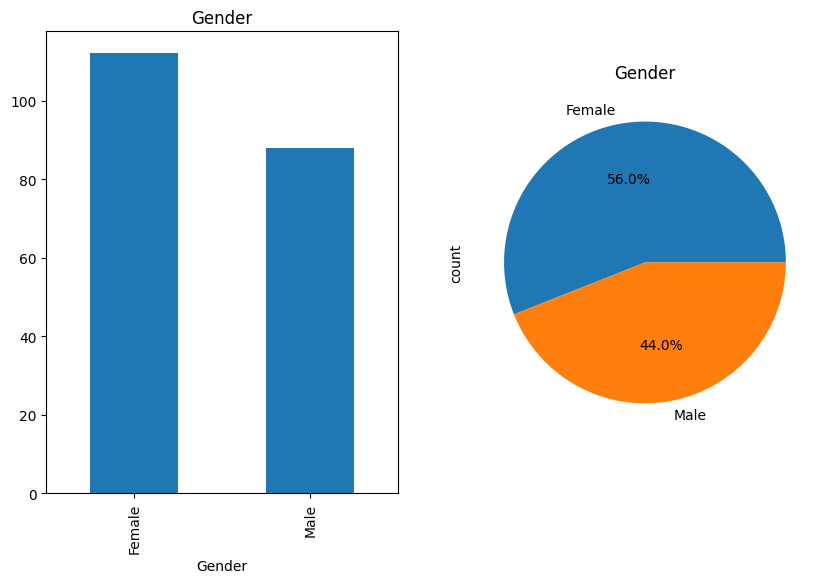

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

count = df['Gender'].value_counts()
count.plot(kind='bar', ax=axs[0])
axs[0].set_title('Gender')

count.plot(kind='pie', ax=axs[1],  autopct='%1.1f%%')
axs[1].set_title('Gender')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

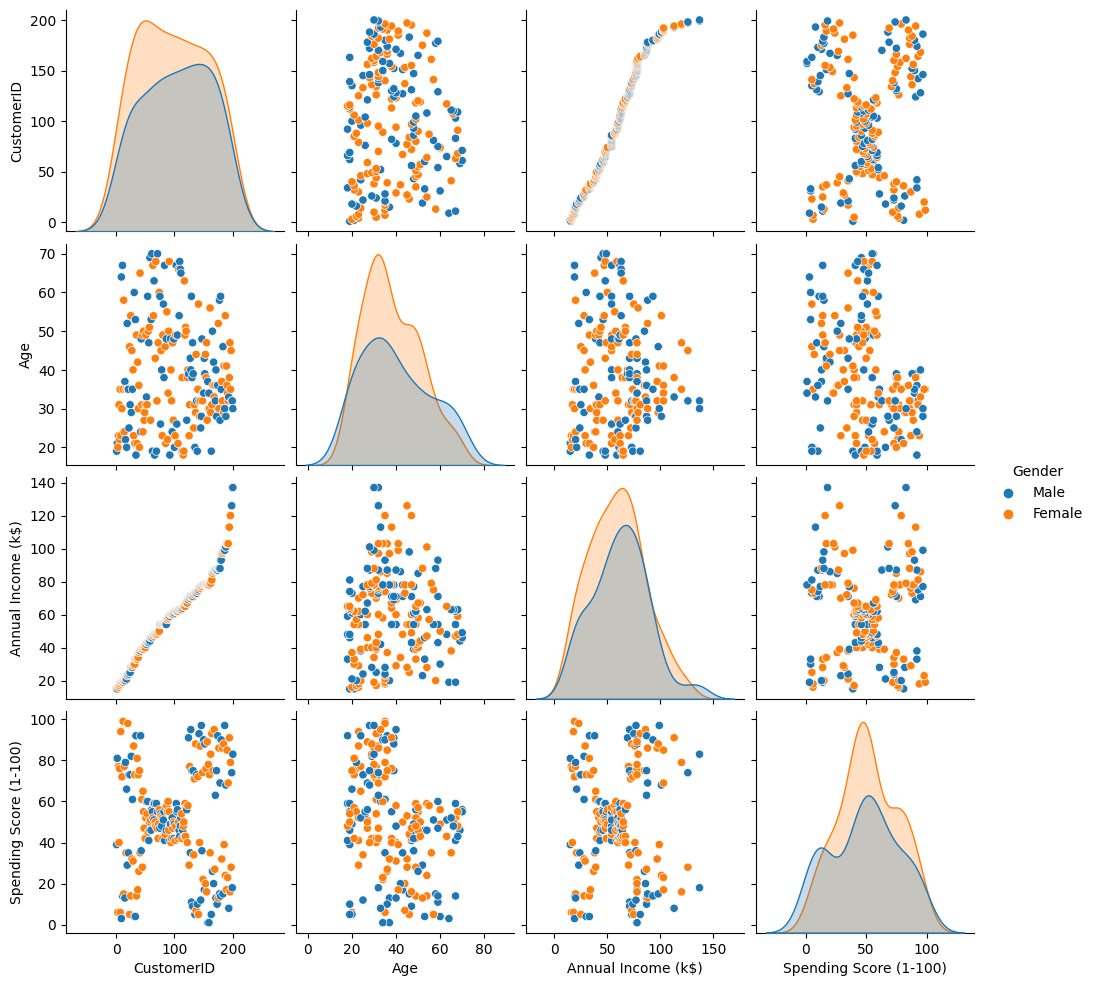

In [11]:
sns.pairplot(df, hue='Gender')

<Axes: >

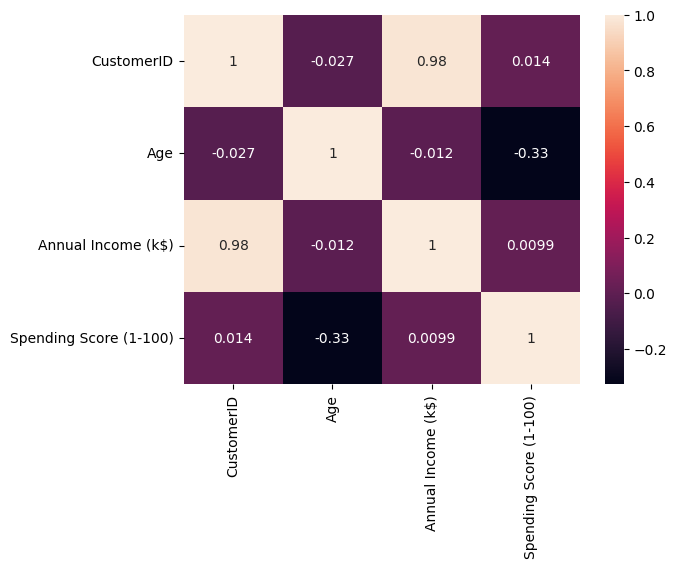

In [12]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# Prepare the data to build the model

In [13]:
gender_encoder = LabelEncoder()

In [14]:
gender_encoded = gender_encoder.fit_transform(df['Gender'])

In [15]:
df['Gender'] = gender_encoded
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [16]:
df.drop(columns = ['CustomerID'], inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Start Building the Model

In [ ]:
n_init = 10
Kmeans_model = KMeans(n_clusters=5, n_init=n_init, random_state=42)
Kmeans_model.fit(X=df)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
df['cluster'] = Kmeans_model.predict(df)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


In [24]:
inertia = []
silhoutte_scores = [0]
for i in range(1, 16):
    n_init = 10
    temp_model = KMeans(n_clusters=i, n_init=n_init, random_state=42)
    temp_model.fit(df)
    inertia.append(temp_model.inertia_)
    if(i >1):
        silhoutte_scores.append(silhouette_score(df, temp_model.labels_, metric='euclidean'))

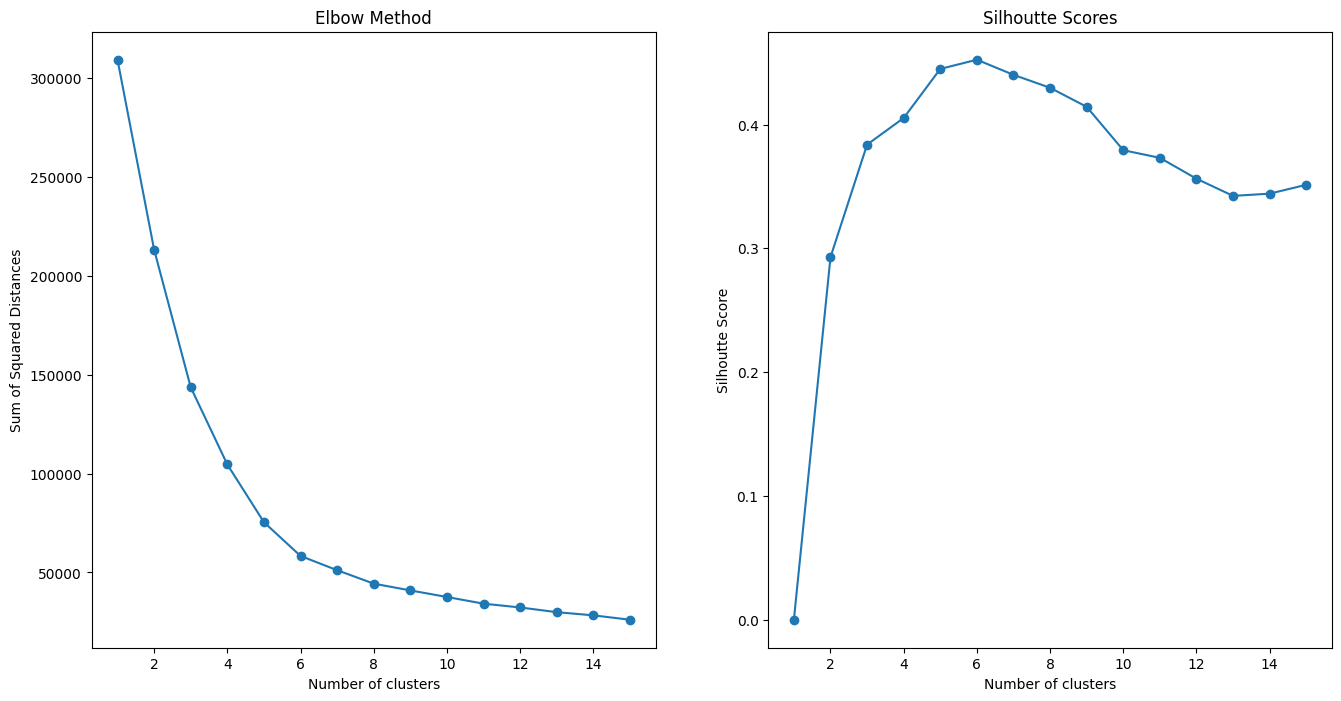

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(range(1, 16), inertia, marker='o')  # Specify ax=ax[0] here
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Sum of Squared Distances')
ax[0].set_title('Elbow Method')


ax[1].plot(range(1, 16), silhoutte_scores, marker='o')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhoutte Score')
ax[1].set_title('Silhoutte Scores')

plt.show()


In [19]:
inertia

[309152.84,
 213176.8439897698,
 143603.60669497383,
 104585.90353769039,
 75427.71182424153,
 58363.1845356398,
 51164.973417432244,
 44372.15325358851,
 40954.16005496007,
 37629.389175381235,
 34244.75694934695,
 32333.355527239168,
 29949.09815581735,
 28345.62423687424,
 26134.204776922426]

In [28]:
silhoutte_scores

[0,
 0.29286665781608123,
 0.38379950218069925,
 0.40529769636216684,
 0.44493777835059417,
 0.45237002173768814,
 0.4401653101734069,
 0.4297011185157375,
 0.41432818153792084,
 0.37927731672338894,
 0.3731161958055831,
 0.3562363278653348,
 0.34237362080889766,
 0.3441866214045249,
 0.35133788028030155]

In [38]:
best_model=KMeans(n_clusters=6, n_init=100, random_state=42)
best_model.fit(df)

KMeans(n_clusters=6, n_init=100, random_state=42)

In [39]:
df['cluster'] = best_model.predict(df)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,5
2,0,20,16,6,0
3,0,23,16,77,5
4,0,31,17,40,0


In [40]:
best_model.inertia_

58363.184535639804

In [43]:
silhouette_score(df, best_model.labels_, metric='euclidean')

0.4530860228876545

In [47]:
clusters = df['cluster'].value_counts()
clusters

cluster
2    44
1    39
4    38
3    35
0    22
5    22
Name: count, dtype: int64

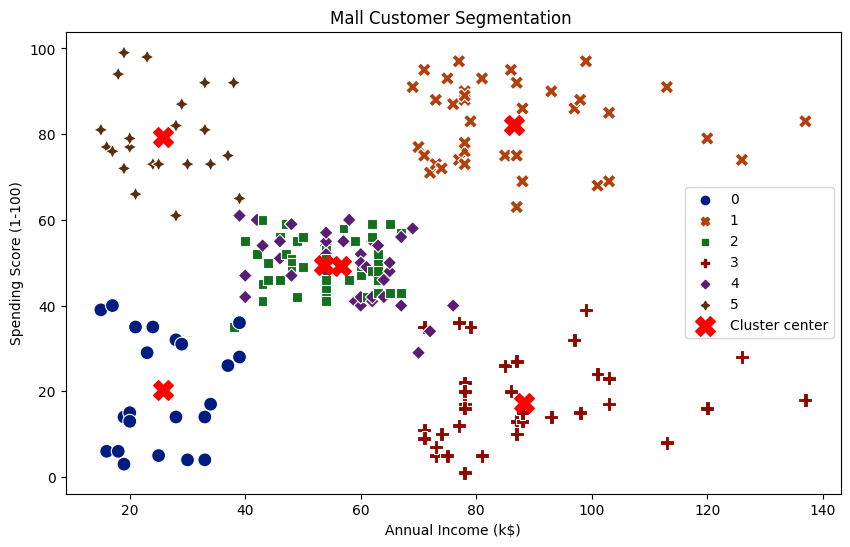

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster',style='cluster', data=df, s=100, palette='dark')
plt.scatter(best_model.cluster_centers_[:, 2], best_model.cluster_centers_[:, 3], s=200, c='red', marker='X', label='Cluster center')
plt.title('Mall Customer Segmentation ')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()